In [1]:
# 2020-10-20 created by Akson

In [7]:
# code9.1
# 自发重采样

import numpy as np

# 10个整数的样例
sample = np.random.randint(low = 1, high = 100, size = 10)
print('Original sample: %s' % sample)
print('Sample mean: %s' % np.mean(sample))

# 重采样100次
resamples = [np.random.choice(sample, size = sample.shape) for i in range(100)]
print('Number of bootstrap re-samples: %s' % len(resamples))
print('Example re-sample: %s' % resamples[0])

resample_means = np.array([resample.mean() for resample in resamples])
print('Mean of resamples: %s' % resample_means.mean())

Original sample: [33 31 73 63 40 87 80 19  1 68]
Sample mean: 49.5
Number of bootstrap re-samples: 100
Example re-sample: [40 31 33 31 19  1 19 19 19 73]
Mean of resamples: 49.496


In [13]:
# code9.2
# 随机森林测试

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples = 1000, n_features = 100, n_informative = 20, n_clusters_per_class = 2, random_state = 11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

# 决策树
clf = DecisionTreeClassifier(random_state = 11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

# 随机森林
clf = RandomForestClassifier(n_estimators = 2000, random_state = 11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       127
           1       0.68      0.75      0.71       123

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       127
           1       0.87      0.87      0.87       123

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



Decision tree accuracy: 0.56
AdaBoost accuracy: 0.64


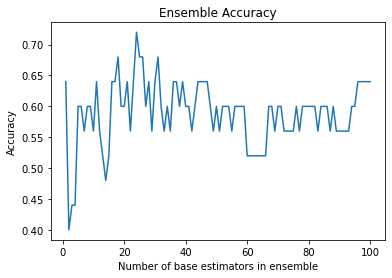

In [23]:
# code9.3
# AdaBoost

%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples = 100, n_features = 50, n_informative = 30, n_clusters_per_class = 3, random_state = 11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

# 决策树
clf = DecisionTreeClassifier(random_state = 11)
clf.fit(X_train, y_train)
print('Decision tree accuracy: %s' % clf.score(X_test, y_test))

# 使用AdaBoost
clf = AdaBoostClassifier(n_estimators = 100, random_state = 11)
clf.fit(X_train, y_train)
print('AdaBoost accuracy: %s' % clf.score(X_test, y_test))

plt.title('Ensemble Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.ylabel('Accuracy')
plt.plot(range(1, 101), [accuracy for accuracy in clf.staged_score(X_test, y_test)])

In [31]:
# code9.4
# 堆叠法

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone, BaseEstimator, TransformerMixin, ClassifierMixin

class StackingClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()
        
    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        self.meta_classifier.fit(self._get_meta_features(X), y)
        return self   
        
    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis = 1)
    
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))
    
    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))
    

X, y = make_classification(n_samples = 100, n_features = 50, n_informative = 30, n_clusters_per_class = 3, random_state = 11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic regression accuracy: %s' % lr.score(X_test, y_test))

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN accuracy: %s' % knn_clf.score(X_test, y_test))

base_classifiers = [lr, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print('Stacking classifier accuracy: %s' % stacking_clf.score(X_test, y_test))

Logistic regression accuracy: 0.8
KNN accuracy: 0.56
Stacking classifier accuracy: 0.8
